Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
order_products_train = pd.read_csv('./order_products__train.csv')
order_products_prior = pd.read_csv('./order_products__prior.csv')
orders      = pd.read_csv('./orders.csv')
products    = pd.read_csv('./products.csv')
aisles      = pd.read_csv('./aisles.csv')
departments = pd.read_csv('./departments.csv')

In [2]:
print("aisle: ",aisles.shape)
print("departments: " ,departments.shape)
print("orders: ",orders.shape)
print("products: ",products.shape)
print("order_products_prior: ",order_products_prior.shape)
print("order_products_train: ",order_products_train.shape)

aisle:  (134, 2)
departments:  (21, 2)
orders:  (3421083, 7)
products:  (49688, 4)
order_products_prior:  (32434489, 4)
order_products_train:  (1384617, 4)


In [4]:
#order_products_train = order_products_train.merge(orders.drop('eval_set', axis=1), on='order_id')
#order_products_prior = order_products_prior.merge(orders.drop('eval_set', axis=1), on='order_id')

In [3]:
#orders[orders["eval_set"]=="pri"] = "prior"
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [4]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [5]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [6]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [7]:
orders.eval_set.value_counts()

eval_set
prior    3214874
train     131209
test       75000
Name: count, dtype: int64

In [8]:
import numpy as np
def get_unique_count(x):
    return len(np.unique(x))
cnt_srs = orders.groupby("eval_set")["user_id"].aggregate(get_unique_count)
cnt_srs

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

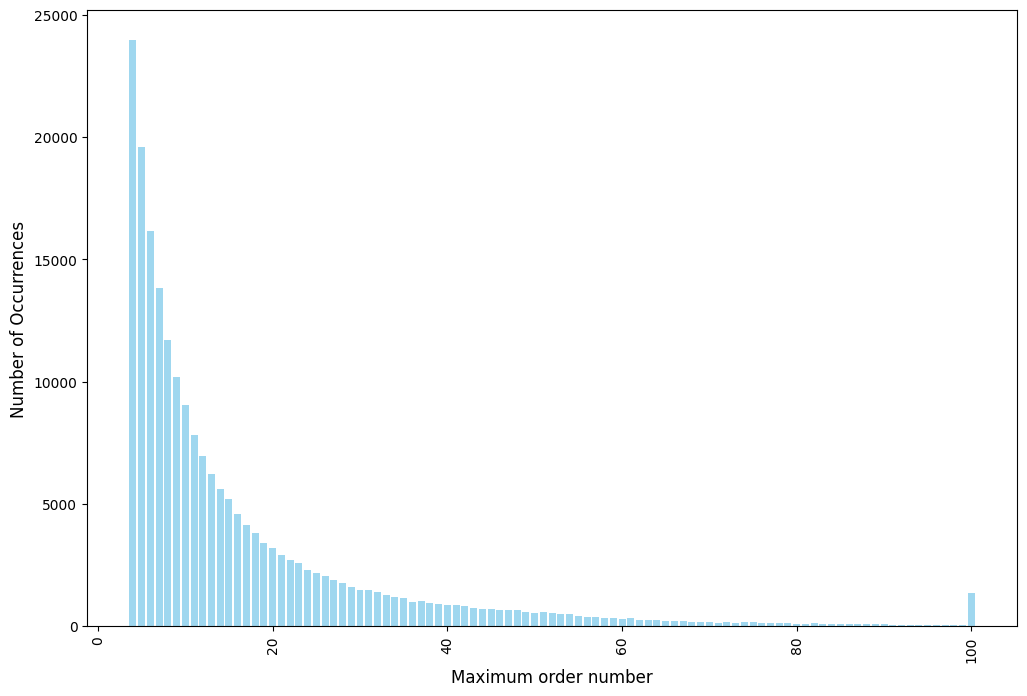

In [9]:
import matplotlib.pyplot as plt
cnt_srs = orders.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
cnt_srs = cnt_srs.order_number.value_counts()

plt.figure(figsize=(12, 8))
plt.bar(cnt_srs.index, cnt_srs.values, alpha=0.8, color='skyblue')  # Use 'skyblue' instead of color[2]
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Maximum order number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

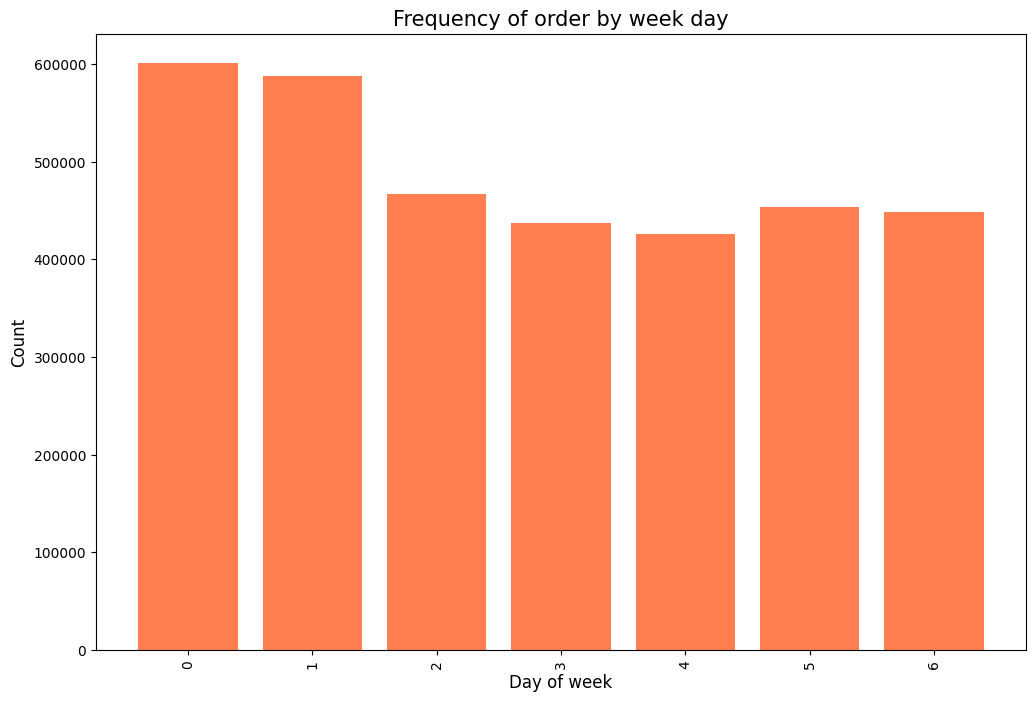

In [10]:
order_dow_counts = orders['order_dow'].value_counts()
plt.figure(figsize=(12,8))
plt.bar(order_dow_counts.index, order_dow_counts.values, color='coral')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=15)
plt.show()

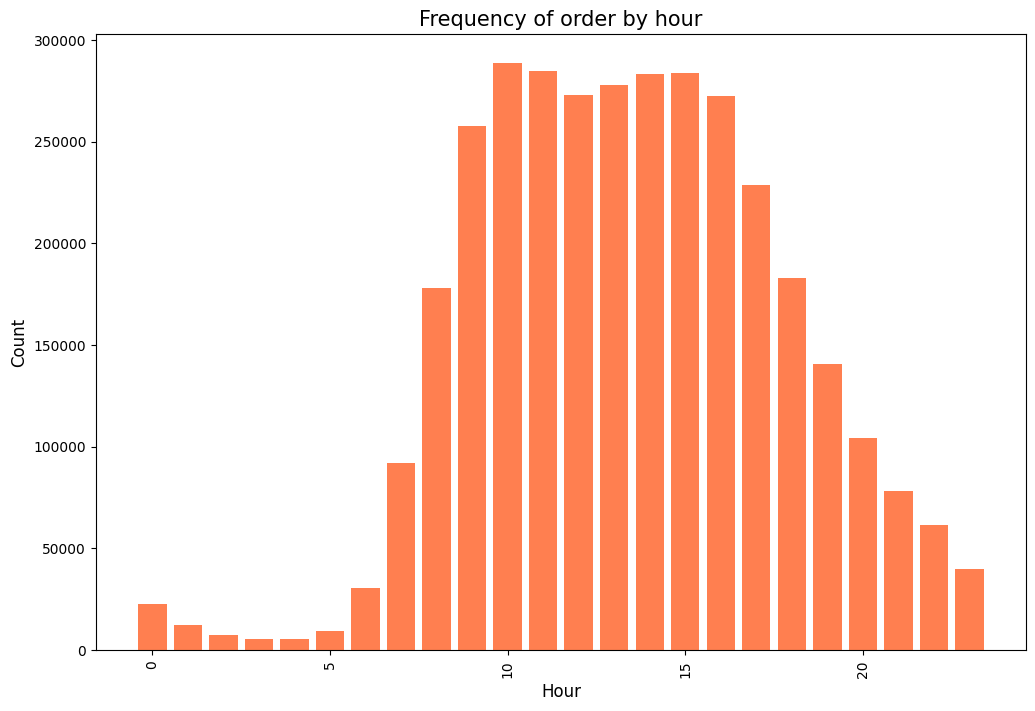

In [11]:
order_hod = orders['order_hour_of_day'].value_counts()
plt.figure(figsize=(12,8))
plt.bar(order_hod.index, order_hod.values, color='coral')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour", fontsize=15)
plt.show()

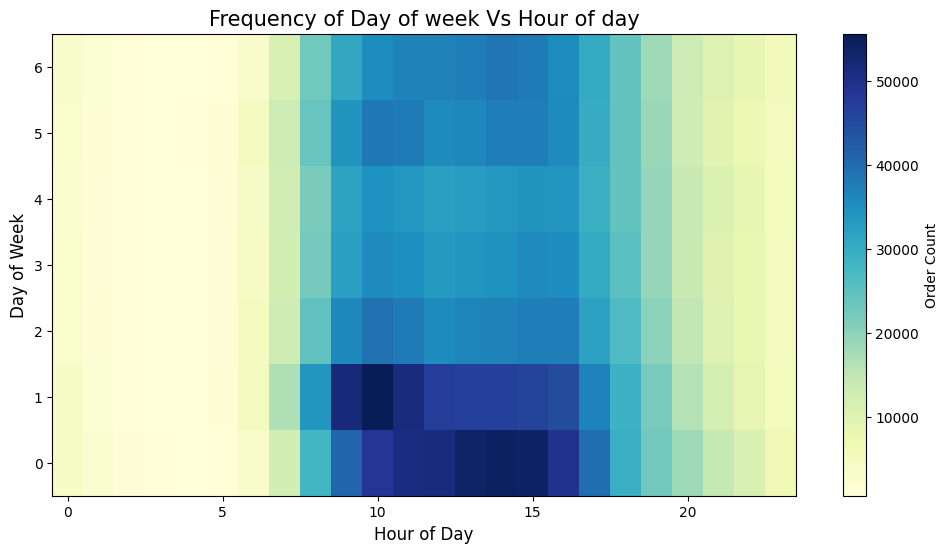

In [12]:
grouped = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
days_of_week = grouped['order_dow'].unique()
hours_of_day = grouped['order_hour_of_day'].unique()
order_counts = grouped.pivot(index='order_dow', columns='order_hour_of_day', values='order_number').values

plt.figure(figsize=(12, 6))
heatmap = plt.pcolor(hours_of_day, days_of_week, order_counts, cmap='YlGnBu')  # Adjust colormap as needed

# Customize labels and title
plt.ylabel('Day of Week', fontsize=12)
plt.xlabel('Hour of Day', fontsize=12)
plt.xticks(rotation=0)  # Optional: Rotate x-axis labels for better readability
plt.title("Frequency of Day of week Vs Hour of day", fontsize=15)

# Add colorbar
plt.colorbar(heatmap, label='Order Count')

plt.show()

In [13]:
orders[orders["eval_set"]=="test"].head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
38,2774568,3,test,13,5,15,11.0
44,329954,4,test,6,3,12,30.0
53,1528013,6,test,4,3,16,22.0
96,1376945,11,test,8,6,11,8.0
102,1356845,12,test,6,1,20,30.0


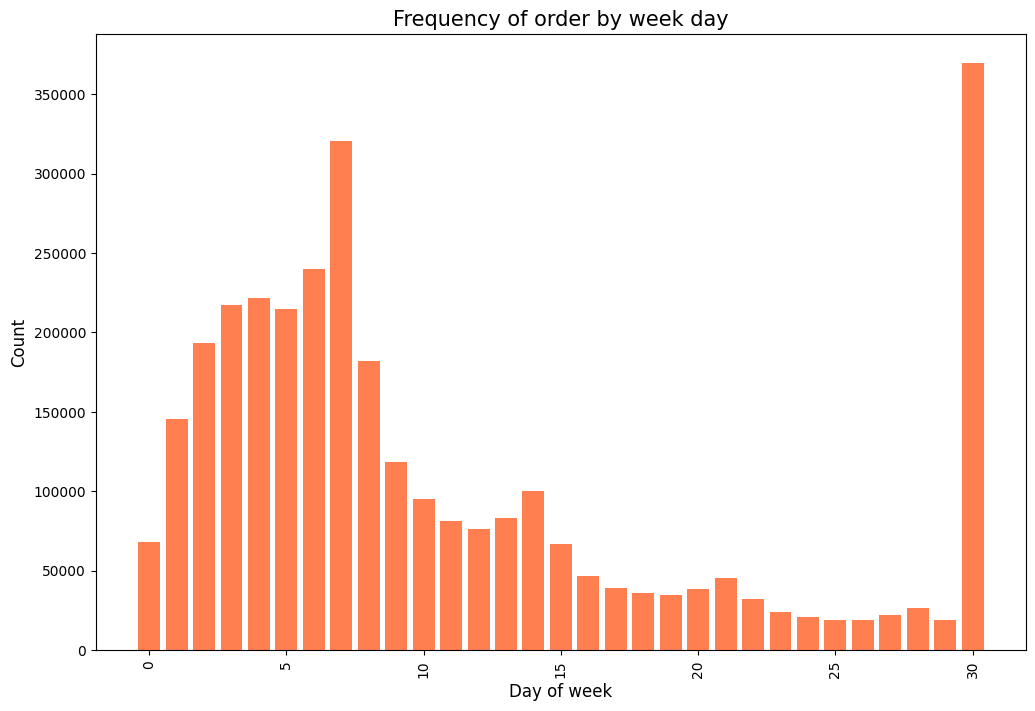

In [14]:
order_hod = orders['days_since_prior_order'].value_counts()
plt.figure(figsize=(12,8))
plt.bar(order_hod.index, order_hod.values, color='coral')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=15)
plt.show()

In [16]:
#Merge orders with prior and train

order_products_train_df = order_products_train.merge(orders.drop('eval_set', axis=1), on='order_id')
order_products_prior_df = order_products_prior.merge(orders.drop('eval_set', axis=1), on='order_id')



In [17]:
order_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,112108,4,4,10,9.0
1,1,11109,2,1,112108,4,4,10,9.0
2,1,10246,3,0,112108,4,4,10,9.0
3,1,49683,4,0,112108,4,4,10,9.0
4,1,43633,5,1,112108,4,4,10,9.0


In [18]:
#From prior, calculate each total orders of user and product
user_product_df = (order_products_prior_df.groupby(['product_id','user_id'],as_index=False)
                                          .agg({'order_id':'count'})
                                          .rename(columns={'order_id':'user_product_total_orders'}))

train_ids = order_products_train_df['user_id'].unique()

#only user in train user
df_X = user_product_df[user_product_df['user_id'].isin(train_ids)]
print(df_X.head())

   product_id  user_id  user_product_total_orders
0           1      138                          2
1           1      709                          1
3           1      777                          1
6           1     1052                          2
9           1     1494                          3


In [19]:
#Get latest order from order_products_train
train_carts = (order_products_train_df.groupby('user_id',as_index=False)
                                      .agg({'product_id':(lambda x: set(x))})
                                      .rename(columns={'product_id':'latest_cart'}))

In [20]:
#Merge lastest order with user and product buy in prior
df_X = df_X.merge(train_carts, on='user_id')
df_X['in_cart'] = (df_X.apply(lambda row: row['product_id'] in row['latest_cart'], axis=1).astype(int))

print(df_X.head())

print(df_X['in_cart'].value_counts())

   product_id  user_id  user_product_total_orders latest_cart  in_cart
0           1      138                          2     {42475}        0
1         907      138                          2     {42475}        0
2        1000      138                          1     {42475}        0
3        3265      138                          1     {42475}        0
4        4913      138                          1     {42475}        0
in_cart
0    7645837
1     828824
Name: count, dtype: int64


In [21]:
#Product feature: Total orders (how many orders include product), mean order add to cart
prod_features = ['product_total_orders','product_avg_add_to_cart_order']

prod_features_df = order_products_prior_df.groupby(['product_id'],as_index=False).agg(
    product_total_orders= ('order_id','nunique'),
    product_avg_add_to_cart_order = ('add_to_cart_order','mean')
)
#prod_features_df.columns = ['product_id'] + prod_features
print(prod_features_df.head())

   product_id  product_total_orders  product_avg_add_to_cart_order
0           1                  1852                       5.801836
1           2                    90                       9.888889
2           3                   277                       6.415162
3           4                   329                       9.507599
4           5                    15                       6.466667


In [22]:
#Merge df_X with production features
df_X = df_X.merge(prod_features_df, on='product_id')
df_X.head()

,product_id,user_id,user_product_total_orders,latest_cart,in_cart,product_total_orders,product_avg_add_to_cart_order
0,1,138,2,{42475},0,1852,5.801836
1,1,709,1,"{45444, 32005, 26893, 8859, 28577, 48036, 1027...",0,1852,5.801836
2,1,777,1,"{43352, 6184, 16797}",0,1852,5.801836
3,1,1052,2,{17207},0,1852,5.801836
4,1,1494,3,{44560},0,1852,5.801836


In [23]:
df_X = df_X.dropna()

In [24]:
df_X.head()

,product_id,user_id,user_product_total_orders,latest_cart,in_cart,product_total_orders,product_avg_add_to_cart_order
0,1,138,2,{42475},0,1852,5.801836
1,1,709,1,"{45444, 32005, 26893, 8859, 28577, 48036, 1027...",0,1852,5.801836
2,1,777,1,"{43352, 6184, 16797}",0,1852,5.801836
3,1,1052,2,{17207},0,1852,5.801836
4,1,1494,3,{44560},0,1852,5.801836


In [25]:
user_features_df = order_products_prior_df.groupby(['user_id'],as_index=False).agg(
    user_total_orders=('order_id','nunique'),
    user_avg_cartsize=('order_id',lambda x: x.shape[0] / x.nunique()),
    user_total_products=('product_id','nunique'),
    user_avg_days_since_prior_order=('days_since_prior_order','mean')
)

In [26]:
df_X = df_X.merge(user_features_df, on='user_id')

#note that dropping rows with NA product_avg_days_since_prior_order is likely a naive choice
df_X = df_X.dropna()
df_X.head()

,product_id,user_id,user_product_total_orders,latest_cart,in_cart,product_total_orders,product_avg_add_to_cart_order,user_total_orders,user_avg_cartsize,user_total_products,user_avg_days_since_prior_order
0,1,138,2,{42475},0,1852,5.801836,32,4.625,55,10.4
1,907,138,2,{42475},0,2025,3.653333,32,4.625,55,10.4
2,1000,138,1,{42475},0,2610,9.503448,32,4.625,55,10.4
3,3265,138,1,{42475},0,5270,6.285958,32,4.625,55,10.4
4,4913,138,1,{42475},0,952,5.534664,32,4.625,55,10.4


In [27]:
#Product-user feature: average add to order\
user_prod_features = ['user_product_avg_add_to_cart_order']
user_prod_features_df = order_products_prior_df.groupby(['product_id','user_id'],as_index=False).agg(
    user_product_avg_add_to_cart_order=("add_to_cart_order","mean"))

user_prod_features_df.columns = ['product_id','user_id'] + user_prod_features
df_X = df_X.merge(user_prod_features_df,on=['user_id','product_id'])
df_X['user_product_order_freq'] = df_X['user_product_total_orders'] / df_X['user_total_orders']

In [28]:
from collections import OrderedDict
#Add user feature: Average day of week, hour of day order
user_features = ['user_avg_order_dow','user_avg_order_hour_of_day']

user_features_df = (order_products_prior_df.groupby(['user_id'],as_index=False)
                                           .agg(OrderedDict(
                                                   [('order_dow','mean'),
                                                    ('order_hour_of_day','mean')])))

user_features_df.columns = ['user_id'] + user_features
df_X = df_X.merge(user_features_df, on='user_id')
df_X = df_X.dropna()


In [29]:
#Add production features (average day of week, house of day, day since prior order )
prod_features = ['product_avg_order_dow', 'product_avg_order_hour_of_day', 'product_avg_days_since_prior_order']

prod_features_df = (order_products_prior_df.groupby(['product_id'], as_index=False)
                                     .agg(OrderedDict(
                                     [('order_dow','mean'),
                                      ('order_hour_of_day', 'mean'),
                                      ('days_since_prior_order', 'mean')])))

prod_features_df.columns = ['product_id'] + prod_features

df_X = df_X.merge(prod_features_df, on='product_id')
df_X = df_X.dropna()


In [30]:
user_prod_features = ['user_product_avg_days_since_prior_order',
                      'user_product_avg_order_dow',
                      'user_product_avg_order_hour_of_day']

user_prod_features_df = (order_products_prior_df.groupby(['product_id','user_id'],as_index=False) \
                                                .agg(OrderedDict(
                                                     [('days_since_prior_order','mean'),
                                                     ('order_dow','mean'),
                                                     ('order_hour_of_day','mean')])))

user_prod_features_df.columns = ['product_id','user_id'] + user_prod_features

df_X = df_X.merge(user_prod_features_df, on=['user_id', 'product_id'])
df_X = df_X.dropna()

In [31]:
f_departments_df = products.merge(departments, on = 'department_id')
f_departments_df = f_departments_df[['product_id', 'department']]

In [32]:
f_departments_df.head()

,product_id,department
0,1,snacks
1,16,snacks
2,25,snacks
3,32,snacks
4,41,snacks


In [33]:
df_X = df_X.merge(f_departments_df, on = 'product_id')
df_X = df_X.dropna()
df_X = pd.concat([df_X, pd.get_dummies(df_X['department'])], axis=1)
del df_X['department']


In [34]:
df_X.columns

Index(['product_id', 'user_id', 'user_product_total_orders', 'latest_cart',
       'in_cart', 'product_total_orders', 'product_avg_add_to_cart_order',
       'user_total_orders', 'user_avg_cartsize', 'user_total_products',
       'user_avg_days_since_prior_order', 'user_product_avg_add_to_cart_order',
       'user_product_order_freq', 'user_avg_order_dow',
       'user_avg_order_hour_of_day', 'product_avg_order_dow',
       'product_avg_order_hour_of_day', 'product_avg_days_since_prior_order',
       'user_product_avg_days_since_prior_order', 'user_product_avg_order_dow',
       'user_product_avg_order_hour_of_day', 'alcohol', 'babies', 'bakery',
       'beverages', 'breakfast', 'bulk', 'canned goods', 'dairy eggs', 'deli',
       'dry goods pasta', 'frozen', 'household', 'international',
       'meat seafood', 'missing', 'other', 'pantry', 'personal care', 'pets',
       'produce', 'snacks'],
      dtype='object')

In [35]:
import numpy as np
np.random.seed(42)
#Train 80%, test 20%
total_users = df_X['user_id'].unique()
test_users = np.random.choice(total_users, size=int(total_users.shape[0] * 0.2), replace=False)


#cross validation split
test_user_sets = []
length = len(test_users)
cv = 8

#split test users to 8
for x in range (0, cv):
    start = int(x/cv*length)
    finish = int((x+1)/cv*length)
    test_user_sets.append(test_users[start:finish])

cv_f1_scores = []
cv_f1_scores_balanced = []
cv_f1_scores_10fit = []


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

from sklearn.preprocessing import MinMaxScaler
for test_user_set in test_user_sets:
    df_X_tr, df_X_te = df_X[~df_X['user_id'].isin(test_user_set)], df_X[df_X['user_id'].isin(test_user_set)]

    y_tr, y_te = df_X_tr['in_cart'], df_X_te['in_cart']
    X_tr, X_te = df_X_tr.drop(['product_id','user_id','latest_cart','in_cart'],axis=1), \
             df_X_te.drop(['product_id','user_id','latest_cart','in_cart'],axis=1), \

    scaler = MinMaxScaler()
    X_tr = pd.DataFrame(scaler.fit_transform(X_tr), columns=X_tr.columns)
    X_te = pd.DataFrame(scaler.fit_transform(X_te), columns=X_te.columns)
    #High C for weak regularization
    lr = LogisticRegression(C=10000000)
    #Test with high weight for lable 1
    lr_balanced = LogisticRegression(class_weight='balanced', C=10000000)
    lr_10x = LogisticRegression(class_weight={1 : 6, 0 : 1}, C=10000000)
    
    lr.fit(X_tr, y_tr)
    cv_f1_scores.append(f1_score(lr.predict(X_te), y_te))

    lr_balanced.fit(X_tr, y_tr)
    cv_f1_scores_balanced.append(f1_score(lr_balanced.predict(X_te), y_te))

    lr_10x.fit(X_tr, y_tr)
    cv_f1_scores_10fit.append(f1_score(lr_10x.predict(X_te), y_te))

print("cv_f1_scores: " +str( np.mean(cv_f1_scores)))
print("cv_f1_scores_balanced: "+str(np.mean(cv_f1_scores_balanced)))
print("cv_f1_scores_10fit: "+str(np.mean(cv_f1_scores_10fit)))

df_X_tr, df_X_te = df_X[~df_X['user_id'].isin(test_users)], df_X[df_X['user_id'].isin(test_users)]

y_tr, y_te = df_X_tr['in_cart'], df_X_te['in_cart']
X_tr, X_te = df_X_tr.drop(['product_id','user_id','latest_cart','in_cart'],axis=1), \
             df_X_te.drop(['product_id','user_id','latest_cart','in_cart'],axis=1), \

lr_10x = LogisticRegression(class_weight={1 : 6, 0 : 1}, C=10000000)
lr_10x.fit(X_tr, y_tr)
print("F1 store all: "+str(f1_score(lr_10x.predict(X_te), y_te)))

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

cv_f1_scores: 0.19741407165696384
cv_f1_scores_balanced: 0.388112276431723
cv_f1_scores_10fit: 0.39195130571069586
F1 store all: 0.3795153795293482


In [37]:
coefficients = pd.DataFrame(lr_10x.coef_, columns = X_tr.columns)
coefficients = np.exp(coefficients)
print(coefficients.T)

                                                0
user_product_total_orders                1.243696
product_total_orders                     1.000003
product_avg_add_to_cart_order            0.952017
user_total_orders                        0.984673
user_avg_cartsize                        1.064488
user_total_products                      0.994081
user_avg_days_since_prior_order          0.994469
user_product_avg_add_to_cart_order       0.970494
user_product_order_freq                  1.014169
user_avg_order_dow                       0.995933
user_avg_order_hour_of_day               0.992769
product_avg_order_dow                    0.996132
product_avg_order_hour_of_day            0.985826
product_avg_days_since_prior_order       0.984802
user_product_avg_days_since_prior_order  1.018192
user_product_avg_order_dow               0.994595
user_product_avg_order_hour_of_day       0.997035
alcohol                                  0.999916
babies                                   0.999911


Training Data Accuracy: 0.83
Test Data Accuracy:     0.83
[[1239386  186237]
 [  80281   81507]]


Precision:              0.30
Recall:                 0.50


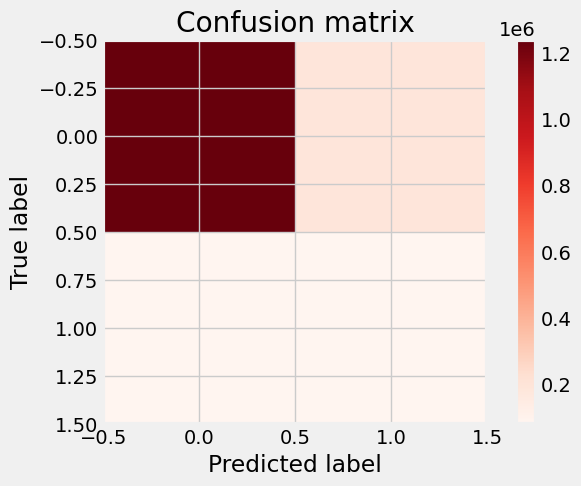

In [40]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

def plot_confusion_matrix(cm,title='Confusion matrix', cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#y_tr=np.ravel(y_tr)

train_acc=lr_10x.score(X_tr, y_tr)
test_acc=lr_10x.score(X_te, y_te)
print("Training Data Accuracy: %0.2f" %(train_acc))
print("Test Data Accuracy:     %0.2f" %(test_acc))

y_true = y_te
y_pred = lr_10x.predict(X_te)


conf = confusion_matrix(y_true, y_pred)
print(conf)

print ('\n')
print ("Precision:              %0.2f" %(conf[1, 1] / (conf[1, 1] + conf[0, 1])))
print ("Recall:                 %0.2f"% (conf[1, 1] / (conf[1, 1] + conf[1, 0])))

cm=confusion_matrix(y_true, y_pred, labels=[0, 1])

plt.figure()
plot_confusion_matrix(cm)
